### Batch gradient descent
- Use **ALL** training samples for one forwars pass and then adjust weights.
- In batch gradient descent we go through all training samples and calculate cumulative error.
- Now we back propogate and adjust weights.

**Example**
- data with inputs(area, bedrooms) and output(price)
- let say you have 4 samples(data points)
- Start 1st epoch
    - itialize weights and bias to some value(let say 1)
    - take first data row as input -> put in model -> find predicted output
    - compare predicted output with thruth value -> calculate loss(error_1).
    - do this for all four samples
- End of 1st epoch
    - you have(error_1, error_2, error_3, error_4)
    get Mean Squared error = e1+e2+e3+e4/4
    - now agjust the weights using the MSE
- Start of 2nd epoch
    - use the newly adjusted weight and bias
    - repeat above process for all samples
- keep running epochs untill the SME is (or stops changing)

**Pros**
- Good for small training set
- can be use for big dataset if u have computation power.

**Cons**
- what if we have 10 million samples?
- to find the cummulative error after every epoch we have to go through 10 million samples 
- we have 2 features(inputs). this requires finding 20 million derivatives.
- to update weight at eng of one epoch.
- what if we have 200 features?
- lot of computationis required.

### Stochastic Gradient Descent(SGD)
- Use **ONE**(randomply picked) sample for a forwad pass and then adjust weights

**Example**
- let say we have 10 million data samples
- 1st iteration
    - Randomly pick single data training sample
    - find out the error
    - start adjusting the weights
- 2nd iteration
    - again randomly pick single data training sample
    - find out the error
    - start adjusting the weights

**Pros**
- Good when training set is very big and we don't want too much computation.

**Cons**
- In this you can't use the vector mathematics of numpy

### Mini Batch Gradient Descent
- Use **A BATCH OF**(randomly picked) samples for forward pass and then adjust weights.
- Similar to SGD. Instead of choosing one random data sample, ypu will use batch of randomly picked training samples.

**Example**
- I have 20 training samples total.
- let's say I use 5 random samples for one forward pass to calculate cumulative error.
- After that I adjust weights.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\utkarsh.alpuria\Desktop\My Work\Python\Python ML\Python ML Algorithm\Deep_Learning\NN_Datasets\homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
# scaling the data 
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop("price", axis="columns"))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
scaled_y = sy.fit_transform(df["price"].values.reshape(df.shape[0], 1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [6]:
np.ones(shape=2)

array([1., 1.])

In [7]:
scaled_X.T # transpose

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [8]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]

    w = np.ones(shape=number_of_features) # weights initialized to 1
    b = 0 # bias initialized to 0
    total_samples = X.shape[0]

    cost_list = [] # for the plot
    epoch_list = [] # for the plot

    for i in range(epochs):
        y_predicted = np.dot(w, scaled_X.T) + b # w1*area + w2*bedrooms + bias

        w_grad = -(2/total_samples)*(X.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true - y_predicted))

        if i%10 == 0: # after every 10 iterations(for the plot)
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500 )
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

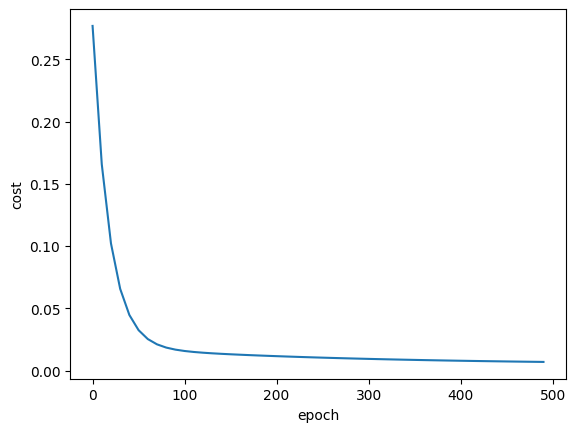

In [9]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [10]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])[0]

    scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 4, w, b)

c:\Users\utkarsh.alpuria\Desktop\My Work\Python\Python ML\Python ML Algorithm\.ml_algo_py_venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [11]:
predict(1500, 3, w, b)

c:\Users\utkarsh.alpuria\Desktop\My Work\Python\Python ML\Python ML Algorithm\.ml_algo_py_venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

In [35]:
import random

def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features.
    # In our case number_of_features = 3(area, bedrooms and age)
    w = np.ones(shape=number_of_features) # weights initialized to 1
    b = 0 # bias initialized to 0
    total_samples = X.shape[0]

    cost_list = [] # for the plot
    epoch_list = [] # for the plot

    for i in range(epochs):
        random_index = random.randint(0, total_samples-1) # to pick random sample
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2/total_samples)*(sample_y - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y - y_predicted)

        if i%100 == 0: # at every 100th iteration recrd the cost and epoch
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 10000) # in sgd u have to use more epochs
w_sgd, b_sgd, cost_sgd

(array([0.70828704, 0.67657421]), -0.2331463844615032, 0.011484275156180234)

In [36]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

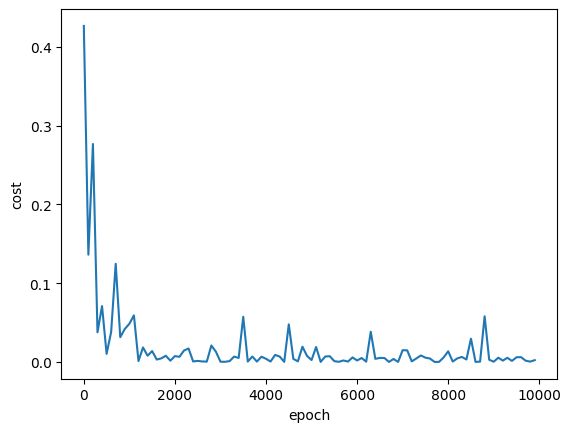

In [37]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [38]:
predict(2600, 4, w_sgd, b_sgd)

c:\Users\utkarsh.alpuria\Desktop\My Work\Python\Python ML\Python ML Algorithm\.ml_algo_py_venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.37794580409474


Implement mini batch gradient descent in python and plot cost vs epoch graph. Mini batch is intermediate version of batch GD and stochastic GD. In stochastic we used one randomly picked training sample, In mini gradient descent you will use a batch of samples in each iterations. For example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulitive error for those 10 samples and then adjust weights. In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in mini batch we do after every m samples (where m is batch size and it is 0 < m < n, where n is total number of samples

In [39]:
np.random.permutation(20)

array([10, 19,  3,  4,  2,  5,  9, 13, 11, 17,  8, 16,  7, 14, 18,  6, 15,
       12,  0,  1])

In [41]:

def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_mini, b_mini, cost_mini, cost_list_mini, epoch_list_mini = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w_mini, b_mini, cost_mini

(array([0.71004866, 0.67815125]), -0.2334567640868904, 0.004702400816890199)

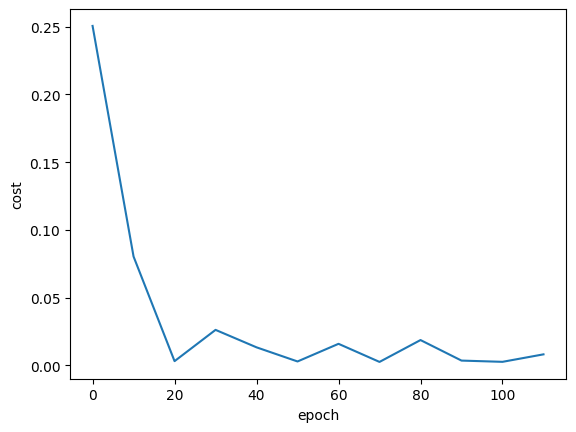

In [42]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mini,cost_list_mini)

In [43]:
# some predictions
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

c:\Users\utkarsh.alpuria\Desktop\My Work\Python\Python ML\Python ML Algorithm\.ml_algo_py_venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596